In [ ]:
'''
构建单个因子：

红三兵”:

条件1、2、3、4
出现“红三兵”，看涨，记为1，否则记为0。
同时满足这5条时，买入信号即触发，即我们给它评1分，否则评0分。


构建多因子的组合：

现在，我们需要把这两个预测因子融合成一个预测。 对于这类问题，基本的思路就是线性组合。 
那么，问题转化为，如何求得一个权重， 使得两个预测因子的线性组合达到“最优”。

步骤一：构建预测因子的组合
步骤二：计算理论上最优的权重
步骤三：调整理论上最优的权重

## chap chap7
'''

In [ ]:
'''
构造单因子：

1、构造因子，即判断方法（方法！）
2、用该方法对所选池子（标的）打分  # 可以为同一时刻的横截面  也可以为同一标的的时间序列
3、检测与改进（所构造的抽象因子与实际标的物的联系，若为预测因子，回溯历史，出现因子后，第二天年的标的为多少，求一个平均。用该平均作为预测数。
              接着，看一下不同种类标的物在时间上的分布，尽量使分布接近，可以考虑标准化
              再有，连续两天出现同一信号的自相关性问题：
                  如果短期内连续出现两次“红三兵”，预测收益是否加倍？ 这就要考虑到红三兵这个信号本身的自相关性了。 如果自相关性高，预测收益大体应该是不变的； 
                  如果自相关性低，那么预测收益翻倍好像也没什么问题。 这自相关性究竟如何影响，也有很多可以研究的东西
              ）

'''

In [ ]:
'''
标准化方法：

接下来把我们的预测标准化。 标准化的方法很多：

算法：
减均值，再除以标准差
利用正态分位数，把预测映射为正态分布
利用S型函数，把预测极化

数据：
利用时间序列数据，每只股票分别标准化
利用截面数据，每日分别标准化
利用面板数据，统一标准化
我们先采用相对简单的方法：使用面板数据，直接使用减均值再除以标准差的方法，统一进行标准化：


排名：
接下来，我们需要在每天按上述比例给股票排名，然后将排名标准化。有读者可能会产生一个疑问，为什么不直接把上述比例作为原始预测？
实际上，这并非不可以。只是，我们需要考虑到，我们要选的，并非仅仅只是要涨的股票，而更应该选择比业绩基准涨得更好的股票。
那么，我们就需要在股票间横向比较每个指标。
那么，具体怎么标准化呢？一个简单而合理的方法是：！！！！！以排名的分位数作为正态分布的分位数，将排名映射为标准正态分布上的一个值！！！！。 

然后，我们把排名转化为分位数，比如，我们有50只股票，则排第一名的（即最小的）股票的分位数为1/51。
然后，我们把这个分位数看作正态分布的分位数，将其映射到一个正态分布上。比如，分位数为0.5的就映射到0，分位数为0.95的，就映射到1.64。 
这里需要用到SciPy这个包，我们这里先使用它，在本章的末尾，我们在详细介绍这个包。


前面，我们对动量信号进行过一次初步的标准化。为什么叫“初步”呢？因为，我们是在截面标准化的，
在时间序列层面，不同股票的动量信号可能波动率完全不同。
可以看出，不同股票间，动量信号的波动率分布在0.4到1.5之间，相差较大。 那么，导致这种差异的原因是什么？
一个自然的想法是，不同股票的主动收益本来就分布不同，有的波动大，有的波动小。 这自然导致其动量信号也是同样，有的波动大，有的波动小。 
那我们可以画图对比一下，我们先画不同股票信号波动率的柱状图：

相关关系的散点图！！！！
从以上两个图中，我们可以粗略看出，确实前面说的性质，波动率本来就较高的股票，其动量信号的波动率也较高。 
那么，二者之间有没有什么相对确定性的关系呢？我们先作个相关关系的散点图：
意味着回归的R方可达0.87。从p值看，回归非常显著。但截距项的存在却让人困惑，要知道，其自变量和因变量都是标准差，不可能为负。
而截距项的存在就可能引入负的标准差。故，我们将其关系简化为无截距项的线性关系

# chap4
'''

# 数据预处理

In [ ]:
# skleran中的数据预处理package：preprocessing

In [63]:
import sklearn.preprocessing as sk_preprocessing

X = np.array([[1, -1, 2], [0, 2, -1], [0, 1, -2]])
scaler = sk_preprocessing.StandardScaler().fit(X)
new_X = scaler.transform(X)
print('基于mean和std的标准化:','\n',new_X)

基于mean和std的标准化: 
 [[ 1.41421356 -1.33630621  1.37281295]
 [-0.70710678  1.06904497 -0.39223227]
 [-0.70710678  0.26726124 -0.98058068]]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 降维

## 1.PCA

In [ ]:
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

#在Python中，主成分的函数位于Scikit-Learn下：

#n_components 
意义：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数。也可以是设置解释变量的比例。6如：pca =PCA(n_components=.98)
类型：int或者string，缺省时默认为None，所有成分保留。赋值为int，比如n_components=1，将把原始数据降到一个维度。赋值为string，比如n_components=’mle’，将自动选取特征个数n，使得满足所要求的方差百分比。
#copy 
类型：bool,True或者False，缺省时默认为True
意义：表示是否在运行算法时，将原始数据复制一份。如果为True，则运行PCA算法后，原始数据的值不会有任何改变。因为是在原始数据的副本上进行运算的。
#whiten 
类型：bool，缺省时默认为False
意义：白化，使每个特征具有相同的方差。

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

data=np.random.randn(10,4)

pca=PCA()
pca.fit(data)
print(pca.components_)  #返回模型的各个特征向量
print(pca.explained_variance_ratio_)  #返回各个成分各自的方差百分比（贡献率）

[[-0.42218643  0.74061864  0.20812925  0.4795048 ]
 [ 0.7337101   0.2975068   0.60605029 -0.07656529]
 [-0.36621964  0.29594779  0.18922151 -0.86168051]
 [-0.38640818 -0.52477485  0.74402989  0.1473757 ]]
[0.50200672 0.25363314 0.20304278 0.04131736]


In [43]:
# 先用PCA函数处理，再用fit 或fit_transform训练

data1 = np.random.randn(10,4)
pca1 = PCA(n_components=None,copy=True,whiten=False,svd_solver='auto')   # 有点问题  如果第一个参数为‘mle’就会没有值
newdata1 = pca1.fit_transform(data1)   # 如果只用fit的话  下面打印newdata1则只是PCA类  而不会显示新的处理后的值

print('PCA:')
print ('降维后的各主成分的方差值',pca1.explained_variance_)
print ('降维后的各主成分的方差值占总方差值的比例',pca1.explained_variance_ratio_)   # 方差值用来衡量贡献度，对模型的解释程度
print ('降维后的特征数',pca1.n_components_)     # 个数
print(data1,'\n\n',newdata1)


# 最大方差理论：信号具有较大的方差，噪声具有较小的方差
# PCA的目标：新坐标系上数据的方差越大越好
# PCA是无监督的学习方法


#  PCA对象的三个属性：pca1.explained_variance_    pca1.explained_variance_ratio_      pca1.n_components_
#   fit(X): 用数据X来训练PCA模型。    fit_transform(X)：用X来训练PCA模型，同时返回降维后的数据。
#   区别  如果只用fit的话  下面打印newdata1则只是PCA类  而不会显示新的处理后的值

PCA:
降维后的各主成分的方差值 [2.09395799 1.23289477 0.41614443 0.33777045]
降维后的各主成分的方差值占总方差值的比例 [0.51312846 0.30212325 0.101977   0.0827713 ]
降维后的特征数 4
[[-0.33095869  0.52658496  0.60754031  0.54220488]
 [ 0.98597754  0.13437707  0.95798877  0.00664784]
 [ 0.58328556  0.15583563  1.88045476  0.82807577]
 [-0.42088892  0.12127442  0.35514766 -1.52033959]
 [ 0.02356802 -1.60513112  0.6098355  -0.22279694]
 [ 0.1218651   2.68337842 -0.09410503 -0.33080685]
 [ 0.27507978 -0.2513356   1.12869059  0.97197306]
 [ 1.18514199 -0.31652605 -2.65678332 -1.44581785]
 [-0.8951009   0.97903633 -0.18117349  0.86310321]
 [-0.56465117  0.34840582  0.99487694  1.21928118]] 

 [[-0.54447152  0.3293705   0.3005723   0.117898  ]
 [-0.25471975 -0.41136953 -0.83446559 -0.49595918]
 [-1.53772881 -0.37354418 -0.64163319 -0.43611525]
 [ 0.84395179 -0.20721745 -0.58572204  1.33814069]
 [ 0.02625173 -1.86950932  0.21252621  0.41215313]
 [ 0.53734172  2.34213169 -0.63050482 -0.03320123]
 [-1.06989981 -0.57630383  0.12428711 -

In [53]:
data1 = np.random.randn(10,4)
pca1 = PCA(n_components=0.85,copy=True,whiten=False,svd_solver='auto')   
# n_components 的值越接近1，给出的主特征值越多。故应该是累积被解释的部分（阈值）
# 注意三个解释部分的比例之和就是大于0.85的  可以改成0.99来验证
newdata1 = pca1.fit_transform(data1)    # ！！！！！！这个应该是求解出来的特征向量（即要解释的部分的“基”）

print('PCA:')
print ('降维后的各主成分的方差值',pca1.explained_variance_)
print ('降维后的各主成分的方差值占总方差值的比例',pca1.explained_variance_ratio_)   # 方差值用来衡量贡献度，对模型的解释程度
print ('降维后的特征数',pca1.n_components_)     # 个数
print(data1,'\n\n',newdata1)

PCA:
降维后的各主成分的方差值 [1.69327186 1.24155598 0.43537623]
降维后的各主成分的方差值占总方差值的比例 [0.4507669  0.33051535 0.11590176]
降维后的特征数 3
[[-0.03462271  1.36377809  1.78494501  0.10039456]
 [-0.32464303  1.30407222 -0.90726569 -0.55667514]
 [ 1.20659481  1.09544893  0.60074613 -0.57687963]
 [-0.58491169  0.15958531 -1.02152334 -0.70746014]
 [-0.00988675  0.55367759  0.33634171  0.96402401]
 [ 1.12549157 -1.05063873  0.5717232   0.86421684]
 [ 1.00272418 -0.98453791 -1.94809757 -0.78814229]
 [ 0.83815348 -0.30356232 -0.50583919 -1.77248688]
 [ 0.7045165   0.84919656  0.7010834   0.29116148]
 [-0.05419727 -1.86297124  1.47271103 -0.15077229]] 

 [[-1.97270708 -0.72683586  0.27419827]
 [ 0.58036846 -1.56044671 -0.45896874]
 [-0.51720342 -0.70316208  0.991417  ]
 [ 1.08140211 -0.5911528  -0.64390942]
 [-0.87741921 -0.2204324  -0.96198776]
 [-0.4606803   1.51394316 -0.2928466 ]
 [ 2.35375277  0.47528219 -0.13657669]
 [ 1.34771706  0.04471703  1.09284507]
 [-0.93653187 -0.3878146   0.09667405]
 [-0.59869852  2

In [30]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca2 = PCA(n_components=2)
newX = pca2.fit_transform(X)
print(X)
print(newX)
print(pca2.explained_variance_ratio_)   # 可以看出第一个特征解释了大部分变量  故可以直接降到一维

print('\n\n',)
pca4 = PCA(n_components=1)
newXX = pca4.fit_transform(X)
print(newXX)
print(pca4.explained_variance_ratio_)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
[0.99244289 0.00755711]



[[ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]
 [-1.38340578]
 [-2.22189802]
 [-3.6053038 ]]
[0.99244289]


In [ ]:
pca=PCA(3)  # 指定维度个数
pca.fit(data)
low_d=pca.transform(data)  #用这个方法来降低维度
pd.DataFrame(low_d).to_excel('result.xlsx')  #保存结果

#pca.inverse_transform(low_d)  #必要时，可以用这个函数来复原数据。

D:\Anaconda\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


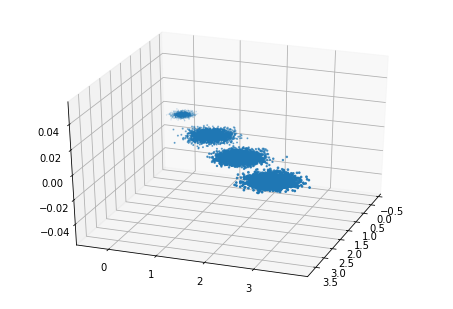

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs

# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
plt.show()

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


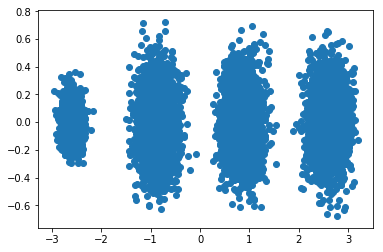

In [60]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')    # 散点图其他参数改进
plt.show()

#####  随机数矩阵

In [6]:
# np生成随机数矩阵
import numpy as np
a1 = np.random.randn(4,4)            # 生成的是标准正态分布的随机数矩阵
a2 = np.random.rand(4,4)             # 生成的是0-1之间分布的随机数矩阵
print(a1,"\n\n\n",a2)

[[-0.11773717  0.73974218 -1.34524012 -1.30366053]
 [-0.05730318  0.85952622 -0.19167924 -0.75852665]
 [-0.06048586 -0.70289497 -1.50063394 -2.05063193]
 [ 0.47930694 -0.47843984  0.34853537  0.25598731]] 


 [[0.73672457 0.56272229 0.89064905 0.99326747]
 [0.85547655 0.91751987 0.03394667 0.43520933]
 [0.55092166 0.40376128 0.70065966 0.51151111]
 [0.45458711 0.62227837 0.25533352 0.67413221]]


In [8]:
# 一般的正态分布随机数       形式:      sigma * np.random.randn(...) + mu           标准差为乘、均值为加   背后的本质思想不过是标准化移项罢了
a3 = 4*np.random.randn(4,4)+5
a3

array([[ 6.06141532,  5.39319817,  2.11053605, 10.4185663 ],
       [-0.6676926 ,  9.30963927,  0.98550668,  3.13149503],
       [-2.99232995,  4.19319672, -1.79994139,  3.82441852],
       [ 6.44224199,  8.57694513,  7.9988286 , 13.23055397]])

# 线性回归

In [5]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt

## 一元一次

In [26]:
xx = Series([4,5,6,7,8])
yy = Series([16,25,36,49,64])

X = sm.add_constant(xx)  #补充常数项  注意与xx的联系
print(X,type(X))
result = (sm.OLS(yy,X)).fit()     # 结果对象
print(result.summary())

print(result.params)   # 获取结果的参数  就是coef的那一列  且小数位数更精确(很长很长)    类型series
print('\n',result.fittedvalues,type(result.fittedvalues))   # 这可以看作是  拟合线的  函数值（用它画图）

   const  0
0    1.0  4
1    1.0  5
2    1.0  6
3    1.0  7
4    1.0  8 <class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     308.6
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           0.000402
Time:                        23:14:28   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

D:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


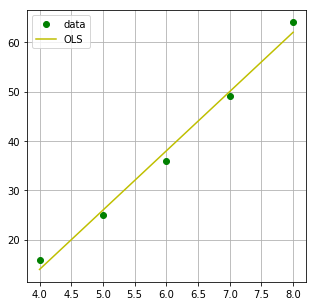

In [29]:
# 在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个或者多个Axes对象。
#每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域。

fig, ax = plt.subplots(figsize=(5,5),num = 1)          #图像格数的大小     分别创建figure axes对象
ax.plot(xx, yy, 'og', label="data")             # 画散点
ax.plot(xx, result.fittedvalues, 'y', label="OLS")   # 画拟合线
ax.legend(loc='best')                             #  参数？？ 没差别？
ax.grid(True)                                     #  注意 原来是直接 plt.plot() plt.legend() 是默认创建画布的
                                                    # 这里用 ax对象 更具体  是对应的figure下的axes

## 一元高次

In [31]:
xxx = Series([1,4,5,6,7,8])
def test(a):
    return a**2+2*a+3

yyy = Series(map(test,xxx))
print(yyy,type(yyy))

0     6
1    27
2    38
3    51
4    66
5    83
dtype: int64 <class 'pandas.core.series.Series'>


In [33]:
XX = np.column_stack((xxx, xxx**2))   #再创建一个 k×2 的 array，两列分别为 x1 和 x2。我们需要 x2 为 x1 的平方   本质！！！
XX = sm.add_constant(XX)             #补充常数项  在 array 上加入一列常项 1  原地修改 !!!!!!!!!小心sm.add_constant(XX)里面是XX本身！！
result = (sm.OLS(yyy,XX)).fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.210e+30
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           1.19e-46
Time:                        23:25:42   Log-Likelihood:                 183.62
No. Observations:                   6   AIC:                            -361.2
Df Residuals:                       3   BIC:                            -361.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   2.66e-14   1.13e+14      0.0

D:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


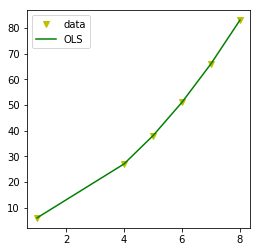

In [41]:
fig1, ax1 = plt.subplots(figsize=(4,4))          #图像格数的大小
ax1.plot(xxx, yyy, 'vy', label="data")
ax1.plot(xxx, result.fittedvalues, 'g', label="OLS")
ax1.legend(loc='best')

## 多元

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series      #  创建矩阵和series
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
#创建数据集
examDict  = {'学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,
                     2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
             '分数':[10,22,13,43,20,22,33,50,62,
                   48,55,75,62,73,81,76,64,82,90,93]}
 
#转换为DataFrame的数据格式
examDf = DataFrame(examDict)
print(examDf.head(4),type(examDf))
print(type(examDf.分数))

   学习时间  分数
0  0.50  10
1  0.75  22
2  1.00  13
3  1.25  43 <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


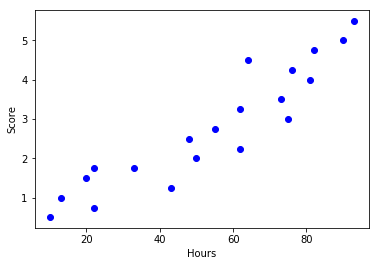

In [44]:
#绘制散点图
plt.scatter(examDf.分数,examDf.学习时间,color = 'b',label = "Exam Data")   #前两个参数都为series
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [52]:
score_corr = examDf.corr()   # 应该是pandas自带的计算矩阵中  两个列（series）的协方差
print(score_corr)
print(score_corr['学习时间'][1])   # 相关系数

          学习时间        分数
学习时间  1.000000  0.923985
分数    0.923985  1.000000
0.9239852119728443


### 正式  读取文件的多元回归

In [61]:
import pandas as pd
adv_data = pd.read_csv("C:/Users/acer/Desktop/Advertising.csv",encoding = "utf-8")  
# 读取文件注意：路径最好是C 斜杠方向

In [64]:
print(adv_data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [83]:
new_adv_data = adv_data.iloc[:,1:]
new_adv_data.head()  # 清理去除第一列不需要的数据

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [84]:
new_adv_data.shape    # 数据矩阵的大小

(200, 4)

In [86]:
print(new_adv_data.describe())
# 25%   #下四分位
# 50%   #中位数      mean为均值
# 75%   #上四分位

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [87]:
print(new_adv_data[new_adv_data.isnull()==True].count())    # 统计缺失值

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [89]:
new_adv_data.isnull().head()   # 对每一个值判断是否缺失  生成的是缺失值矩阵 

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [90]:
new_adv_data[new_adv_data.isnull()==True]

,TV,radio,newspaper,sales
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


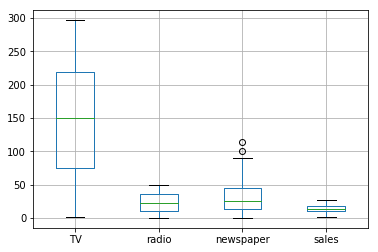

In [96]:
new_adv_data.boxplot()        #  直接用矩阵画图！    whis=1.5 可以添加参数  对异常值的多少会有影响
plt.savefig("boxplot.jpg")   # 直接保存画布   pyplot自带的！！！
plt.show()               
# 箱型图  各个含义： 上、下边缘（max、min）   上、下四分位数  中位数  圆圈为异常值
# 箱形图的中位数和上四分位数的间距比较窄的话，对应曲线图，这个间距内的数据比较集中，
# 还有就是箱形图的上（下）边缘比较长的话，对应曲线图，尾巴就比较长（可以看分布是左偏、右偏）

In [97]:
print(new_adv_data.corr())   # 相关性系数矩阵
# 相关系数0~0.3弱相关    0.3~0.6中等程度相关    0.6~1强相关

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


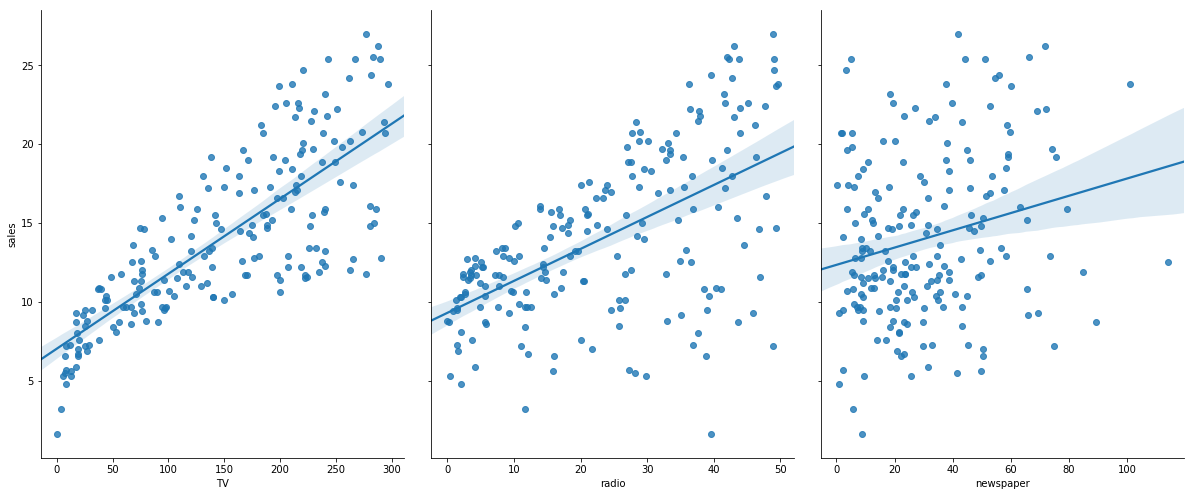

In [115]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(new_adv_data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8,kind = 'reg',markers=["o"])
# plt.savefig("pairplot.jpg")
plt.show()
#  参数说明  第一个为数据矩阵   第二、第三个为确定的x、y轴的变量   否则将使用全部变量（会出现4*4矩阵）
#  size就是大小  kind='reg'  是 直接使用回归进行拟合  并打出95%水平的置信带   markers=["v"] 是改变点的形状

In [116]:
import sklearn

In [117]:
#  用机器学习的方法  把一部分划分为训练集 一部分为测试集
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.ix[:,:3],new_adv_data.sales,train_size=.80)

print("原始数据特征:",new_adv_data.ix[:,:3].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
 
print("原始数据标签:",new_adv_data.sales.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (200, 3) ,训练数据特征: (160, 3) ,测试数据特征: (40, 3)
原始数据标签: (200,) ,训练数据标签: (160,) ,测试数据标签: (40,)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [121]:
X_train.head()

,TV,radio,newspaper
96,197.6,3.5,5.9
146,240.1,7.3,8.7
129,59.6,12.0,43.1
155,4.1,11.6,5.7
69,216.8,43.9,27.2


In [123]:
Y_train.head()   # 可以看出 X\Y 训练的行数是对应的

96     11.7
146    13.2
129     9.7
155     3.2
69     22.3
Name: sales, dtype: float64

In [126]:
model = LinearRegression()   # sklearn里的
model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b,type(b))

最佳拟合线:截距 3.0718114289735574 ,回归系数： [ 0.04573003  0.1889325  -0.00382291] <class 'numpy.ndarray'>


In [128]:
# R平方越高，回归模型越精确(取值范围0~1)，1无误差，0无法完成拟合    1最好
score = model.score(X_test,Y_test)   # model是创建的回归类      .score：返回该次预测的系数R2
print(score)

0.9038976513346593


In [129]:
Y_pred = model.predict(X_test)  # 预测数值  应该是利用回归得出的函数   对X_test进行预测
print(Y_pred)

[15.56317695 10.03948636 12.0652359  12.0412997  20.8300557  13.70913867
  5.81442266 11.37459277 17.16066695  8.93189986 12.22729217 15.19083838
 12.14253208 10.07488535 13.8641987  13.15701362 14.67143031 10.69262842
 14.25031386 10.45836639 18.76261692 21.64777697  9.85318465 10.53978674
 17.81004802 10.91166591 21.16511539  3.64858122  8.58687948  8.55637517
 21.93862973 18.05107676  8.9077488  20.82004181 21.21550295  9.18986003
 22.87937247 17.11921958  6.12359001  8.23138243]


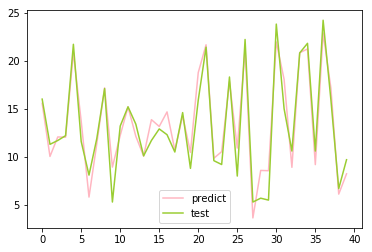

In [143]:
# 预测值和真实值的对比
plt.plot(Y_pred,'#FFB6C1',label="predict")   # 画出预测的值   不懂为什么第一个参数  range(len(Y_pred)), 没啥影响
plt.plot(range(len(Y_pred)),Y_test,'#9ACD32',label='test')   # 好像在这里  只要加上第一个参数 才可以 否则是散乱的图
# plt.savefig("predict.,jpg")                               # 明白了 第一个参数是指定x的变化  如果预测部分不加这个 应该是按原来随机生成的x画图 
plt.legend()
plt.show()

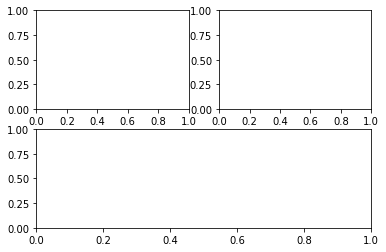

In [19]:
# 参数有门道
plt.subplot(221) # 第一行的左图
plt.subplot(222) # 第一行的右图
plt.subplot(212) # 第二整行
# plt.subplot(111)
plt.show()

##### 创建矩阵 添加行、列标签         矩阵索引

In [65]:
import pandas as pd
data=[[1,2,3],[4,5,6]]
index=['a','b']#行号
columns=['c','d','e']#列号
df=pd.DataFrame(data,index=index,columns=columns)#生成一个数据框    index参数是行号
df

,c,d,e
a,1,2,3
b,4,5,6


In [70]:
print(df.loc['a'],'\n',df.iloc[0],'\n',df.ix[0],'\n',df.ix['a'])    # 三个函数直接使用都是索引   行

c    1
d    2
e    3
Name: a, dtype: int64 
 c    1
d    2
e    3
Name: a, dtype: int64 
 c    1
d    2
e    3
Name: a, dtype: int64 
 c    1
d    2
e    3
Name: a, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [75]:
print(df,'\n',df.loc[:,'c'],'\n',df.iloc[:,0],'\n',df.ix[:,0])

   c  d  e
a  1  2  3
b  4  5  6 
 a    1
b    4
Name: c, dtype: int64 
 a    1
b    4
Name: c, dtype: int64 
 a    1
b    4
Name: c, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [80]:
qwe = df.loc['a','d']    # 可以直接取到单个值
print(qwe,'\n',type(qwe))

2 
 <class 'numpy.int64'>


In [ ]:
行、列一起索引     索引多行多列

In [81]:
df.loc[:,'c':'d']

,c,d
a,1,2
b,4,5


In [ ]:
# scipy 科学计算的问题
'''
scipy.cluster 聚类
scipy.constants 物理/数学常数
scipy.fftpack 傅里叶变换
scipy.integrate 积分
scipy.interpolate 插值
scipy.io 输入输出
scipy.linalg 线性代数
scipy.ndimage n维图像
scipy.odr 正交距离回归
scipy.optimize 优化
scipy.signal 信号处理
scipy.sparse 稀疏矩阵
scipy.spatial 空间数据结构和算法
scipy.special 特殊数学函数
scipy.stats 统计'''


https://www.scipy.org/
'''

In [ ]:
# 快捷键：Y\M\R 装换格式